**Rugosidade pás eólicas - TCC MBA USP/ESALQ**

Antonio Piratelli Filho (Adaptado de Favero, USP/ESALQ)

Data: 27/07/2025 - Versão 4.0 (corrigido após defesa do TCC)

**ANALISE DE REGRESSÃO MÚLTIPLA PARA AS VARIAVEIS RUGOSIDADE Ra, Rz E Rq**

In [1]:
# INSTALAÇÃO DE PACOTES
!pip install -U seaborn
!pip install pingouin
!pip install statstests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.4 MB/s eta 0:00:00


In [2]:
# Importação dos pacotes

import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
import pingouin as pg # outro modo para obtenção de matrizes de correlações
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [3]:
# Carregando banco de dados
df_rugosidade = pd.read_csv('rugosidade_eolica3.csv', delimiter=';',encoding='latin-1')
df_rugosidade
# Características das variáveis do dataset
df_rugosidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PÁ       480 non-null    int64  
 1   Lado     480 non-null    int64  
 2   Area     480 non-null    int64  
 3   Posição  480 non-null    int64  
 4   Ra       480 non-null    float64
 5   Rz       480 non-null    float64
 6   Rq       480 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 26.4 KB


In [4]:
# Verificando o numero de niveis de cada variavel
df_rugosidade.nunique()

,0
PÁ,2
Lado,2
Area,3
Posição,8
Ra,243
Rz,388
Rq,270


In [5]:
# Visualizar arquivo de dados
df_rugosidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PÁ       480 non-null    int64  
 1   Lado     480 non-null    int64  
 2   Area     480 non-null    int64  
 3   Posição  480 non-null    int64  
 4   Ra       480 non-null    float64
 5   Rz       480 non-null    float64
 6   Rq       480 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 26.4 KB


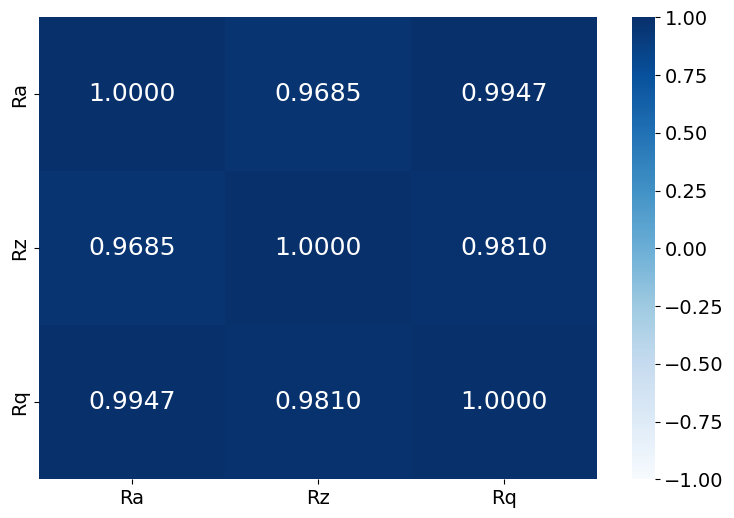

In [22]:
# Matriz de correlações entre as variáveis Ra, Rz e Rq
correlation_matrix = df_rugosidade.iloc[:,4:7].corr()
correlation_matrix
# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(9, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.Blues,
                      annot_kws={'size': 18}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.show()

**(1) Modelo com variavel 'Y' ORIGINAL e variaveis 'X' lineares SEM interacoes**

Analise para Ra

In [23]:
# Definição da fórmula utilizada no modelo
#lista_colunas = list(df_rugosidade.drop(columns=['Ra','Rq','Rz']).columns)
x1=df_rugosidade.PÁ
x2=df_rugosidade.Lado
x3=df_rugosidade.Area
x4=df_rugosidade.Posição
formula2 = 'x1 + x2 + x3 + x4'
formula = 'Ra ~ ' + formula2
formula

'Ra ~ x1 + x2 + x3 + x4'

In [24]:
# Regressao Ra
modelo_rugosidadeRa=sm.OLS.from_formula(formula,df_rugosidade).fit()
modelo_rugosidadeRa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ra   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     42.48
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.83e-30
Time:                        17:12:43   Log-Likelihood:                -867.23
No. Observations:                 480   AIC:                             1744.
Df Residuals:                     475   BIC:                             1765.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8001      0.363     -2.203      0.028      -1.514      -0.086
x1             1.7108      0.135     12.650      0.000       1.445       1.977
x2             0.2082      0.135      1.540      0.124      -0.058       0.474
x3            -0.2002      0.083     -2.417      0.016      -0.363      -0.037
x4            -0.0380      0.030     -1.289      0.198      -0.096       0.020
==============================================================================
Omnibus:                      151.362   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.677
Skew:                           1.603   Prob(JB):                     1.96e-81
Kurtosis:                       5.882   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Regressao Stepwise Ra
from statstests.process import stepwise
modelo_step_rugosidadeRa = stepwise(modelo_rugosidadeRa, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.19791337123462743 

Estimating model...: 
 Ra ~ Q('x1') + Q('x2') + Q('x3')

 Discarding atribute "Q('x2')" with p-value equal to 0.12459040333786679 

Estimating model...: 
 Ra ~ Q('x1') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x4')", 'p-value': 0.19791337123462743}
{'atribute': "Q('x2')", 'p-value': 0.12459040333786679}

 Model after stepwise process...: 
 Ra ~ Q('x1') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:                     Ra   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     82.58
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.59

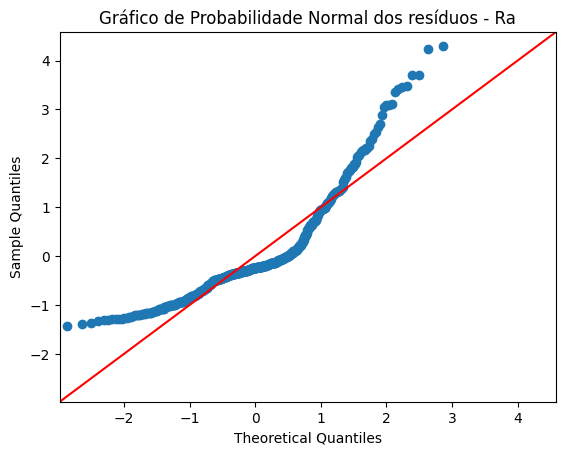

In [26]:
# Teste de normalidade: gráfico de probabilidade Normal
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_rugosidadeRa.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal dos resíduos - Ra")
plt.show()

In [159]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_rugosidadeRa.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.8529860559433982
statistics z  :  8.611012956441567
p-value  :  3.620890177458374e-18
Statistics W=0.85299, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [31]:
# Função para teste Breusch-Pagan (diagnóstico de heterocedasticidade)
def breusch_pagan_test(modelo):
    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})

    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))

    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()

    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)

    anova_table['sum_sq'] = anova_table['sum_sq']/2

    chisq = anova_table['sum_sq'].iloc[0]

    p_value = stats.chi2.pdf(chisq, 1)*2

    print(f"chisq: {chisq}")

    print(f"p-value: {p_value}")

    return chisq, p_value

In [160]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_rugosidadeRa)
# Interpretação
teste_bp = breusch_pagan_test(modelo_rugosidadeRa) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 119.15892995617327
p-value: 9.746392330434533e-28
chisq: 119.15892995617327
p-value: 9.746392330434533e-28
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


Analise para Rz

In [33]:
formula = 'Rz ~ ' + formula2
# Regressao Rz
modelo_rugosidadeRz=sm.OLS.from_formula(formula,df_rugosidade).fit()
modelo_rugosidadeRz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Rz   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     53.01
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           6.38e-37
Time:                        17:22:29   Log-Likelihood:                -1660.5
No. Observations:                 480   AIC:                             3331.
Df Residuals:                     475   BIC:                             3352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0987      1.896     -2.161      0.031      -7.825      -0.372
x1            10.0231      0.706     14.197      0.000       8.636      11.410
x2             0.3894      0.706      0.552      0.582      -0.998       1.777
x3            -1.1272      0.432     -2.607      0.009      -1.977      -0.278
x4            -0.2833      0.154     -1.839      0.067      -0.586       0.019
==============================================================================
Omnibus:                      145.560   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.848
Skew:                           1.560   Prob(JB):                     2.16e-75
Kurtosis:                       5.732   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Regressao Stepwise Rz
from statstests.process import stepwise
modelo_step_rugosidadeRz = stepwise(modelo_rugosidadeRz, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x2')" with p-value equal to 0.5815046096716034 

Estimating model...: 
 Rz ~ Q('x1') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.06637586053728295 

Estimating model...: 
 Rz ~ Q('x1') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x2')", 'p-value': 0.5815046096716034}
{'atribute': "Q('x4')", 'p-value': 0.06637586053728295}

 Model after stepwise process...: 
 Rz ~ Q('x1') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:                     Rz   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.75e-

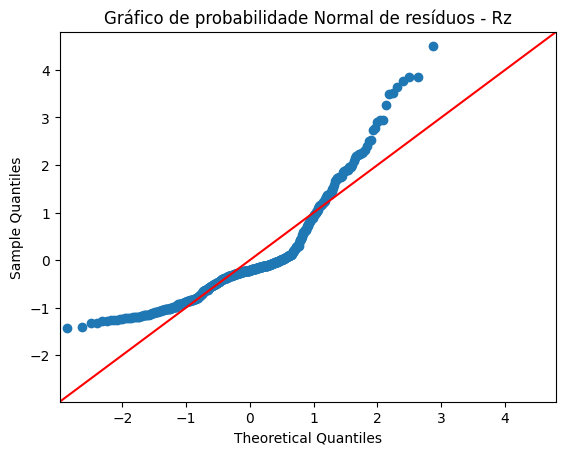

In [35]:
# Teste de normalidade: gráfico de probabilidade Normal (Rz)
fig = sm.qqplot(modelo_rugosidadeRz.resid, line='45', fit=True)
plt.title("Gráfico de probabilidade Normal de resíduos - Rz")
plt.show()

In [161]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_rugosidadeRz.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.8578438297414267
statistics z  :  8.537493510899985
p-value  :  6.858233616504034e-18
Statistics W=0.85784, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [162]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_rugosidadeRz)
# Interpretação
teste_bp = breusch_pagan_test(modelo_rugosidadeRz) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 134.9885160844545
p-value: 3.3450901154260143e-31
chisq: 134.9885160844545
p-value: 3.3450901154260143e-31
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


Analise para Rq

In [44]:
formula = 'Rq ~ ' + formula2
# Regressao Rq
modelo_rugosidadeRq=sm.OLS.from_formula(formula,df_rugosidade).fit()
modelo_rugosidadeRq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Rq   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     39.66
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.15e-28
Time:                        17:25:24   Log-Likelihood:                -998.19
No. Observations:                 480   AIC:                             2006.
Df Residuals:                     475   BIC:                             2027.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8950      0.477     -1.876      0.061      -1.833       0.043
x1             2.1753      0.178     12.244      0.000       1.826       2.524
x2             0.2118      0.178      1.192      0.234      -0.137       0.561
x3            -0.2598      0.109     -2.388      0.017      -0.474      -0.046
x4            -0.0486      0.039     -1.253      0.211      -0.125       0.028
==============================================================================
Omnibus:                      159.582   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.838
Skew:                           1.650   Prob(JB):                     9.22e-93
Kurtosis:                       6.210   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Regressao Stepwise Rq
from statstests.process import stepwise
modelo_step_rugosidadeRq = stepwise(modelo_rugosidadeRq, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x2')" with p-value equal to 0.2337185419903937 

Estimating model...: 
 Rq ~ Q('x1') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.21096376555844903 

Estimating model...: 
 Rq ~ Q('x1') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x2')", 'p-value': 0.2337185419903937}
{'atribute': "Q('x4')", 'p-value': 0.21096376555844903}

 Model after stepwise process...: 
 Rq ~ Q('x1') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:                     Rq   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     77.65
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           6.39e-

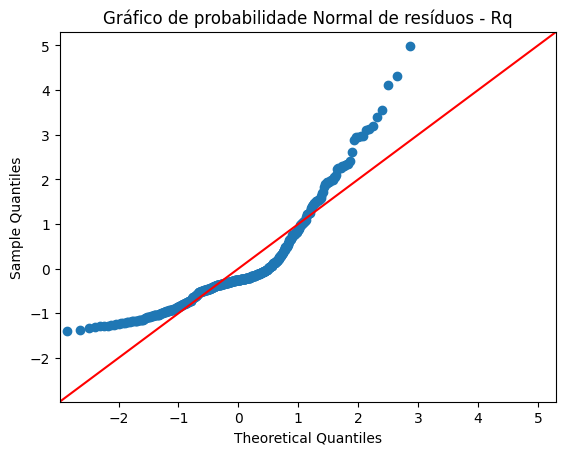

In [46]:
# Teste de normalidade: gráfico de probabilidade Normal (Rq)
fig = sm.qqplot(modelo_rugosidadeRq.resid, line='45', fit=True)
plt.title("Gráfico de probabilidade Normal de resíduos - Rq")
plt.show()

In [163]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_rugosidadeRq.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.8484507931329982
statistics z  :  8.677490833721896
p-value  :  2.02297907490992e-18
Statistics W=0.84845, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [164]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_rugosidadeRq)
# Interpretação
teste_bp = breusch_pagan_test(modelo_rugosidadeRq) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 108.44306556379738
p-value: 2.1688358378755477e-25
chisq: 108.44306556379738
p-value: 2.1688358378755477e-25
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


**(2) Modelo com variavel 'Y medias' ORIGINAL (SEM TRANSFORMAÇÃO) e variaveis 'X'**

In [49]:
# Determinando as medias de Ra, Rz e Rq, inserindo em um novo dataframe
medias_Ra = df_rugosidade.groupby(['PÁ', 'Lado', 'Area', 'Posição'])['Ra'].mean()
medias_Rz = df_rugosidade.groupby(['PÁ', 'Lado', 'Area', 'Posição'])['Rz'].mean()
medias_Rq = df_rugosidade.groupby(['PÁ', 'Lado', 'Area', 'Posição'])['Rq'].mean()
# Se desejar, pode converter o resultado para um DataFrame:
df_medias = pd.DataFrame({'medias_Ra': medias_Ra, 'medias_Rz': medias_Rz, 'medias_Rq': medias_Rq})
df_medias.tail()

medias_Ra  medias_Rz  medias_Rq
PÁ Lado Area Posição                                 
2  2    3    4            1.324      7.512      1.650
             5            1.660      8.528      2.044
             6            1.698      9.406      2.184
             7            2.894     13.986      3.558
             8            2.752     12.122      3.322

Analise de REGRESSÃO para medias de Ra

In [50]:
# Definição da fórmula utilizada no modelo
#lista_colunas = list(df_medias.drop(columns=['medias_Ra','medias_Rq','medias_Rz']).columns)
x1=df_medias.index.get_level_values('PÁ')
x2 = df_medias.index.get_level_values('Lado')
x3 = df_medias.index.get_level_values('Area')
x4 = df_medias.index.get_level_values('Posição')
formula2 = 'x1 + x2 + x3 + x4'
formula = 'medias_Ra ~ ' + formula2
formula

'medias_Ra ~ x1 + x2 + x3 + x4'

In [51]:
# Regressao medias Ra
modelo_rugosidade_mediasRa=sm.OLS.from_formula(formula,df_medias).fit()
modelo_rugosidade_mediasRa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              medias_Ra   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.51e-22
Time:                        17:25:59   Log-Likelihood:                -85.022
No. Observations:                  96   AIC:                             180.0
Df Residuals:                      91   BIC:                             192.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8001      0.330     -2.422      0.017      -1.456      -0.144
x1             1.7108      0.123     13.909      0.000       1.466       1.955
x2             0.2082      0.123      1.693      0.094      -0.036       0.453
x3            -0.2002      0.075     -2.657      0.009      -0.350      -0.051
x4            -0.0380      0.027     -1.418      0.160      -0.091       0.015
==============================================================================
Omnibus:                        3.541   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.037
Skew:                           0.429   Prob(JB):                        0.219
Kurtosis:                       3.157   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Regressao Stepwise medias Ra
from statstests.process import stepwise
modelo_step_rugosidade_mediasRa = stepwise(modelo_rugosidade_mediasRa, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.1597185654775618 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x3')

 Discarding atribute "Q('x2')" with p-value equal to 0.09565891454704727 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x4')", 'p-value': 0.1597185654775618}
{'atribute': "Q('x2')", 'p-value': 0.09565891454704727}

 Model after stepwise process...: 
 medias_Ra ~ Q('x1') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:              medias_Ra   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     97.25
Date:                Wed, 13 Aug 2025   Prob (F-

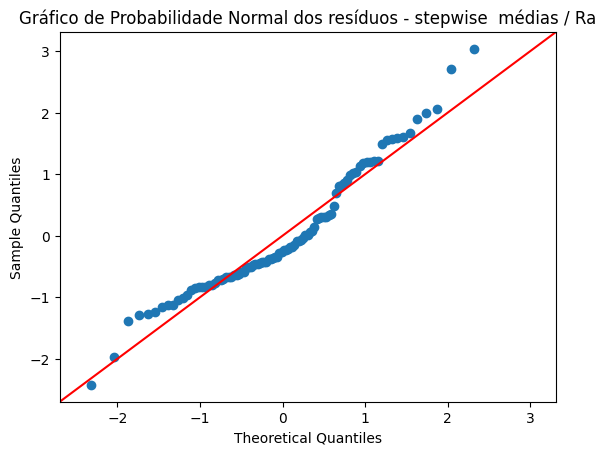

In [53]:
# Teste de normalidade: gráfico de probabilidade Normal
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_rugosidade_mediasRa.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal dos resíduos - stepwise  médias / Ra")
plt.show()

In [165]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_rugosidade_mediasRa.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9501054139854422
statistics z  :  2.9163287742655877
p-value  :  0.0017708853312567371
Statistics W=0.95011, p-value=0.001771
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [166]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_rugosidade_mediasRa)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_rugosidade_mediasRa) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 6.337372715145849
p-value: 0.013330377143208817
chisq: 6.337372715145849
p-value: 0.013330377143208817
Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade


Analise de REGRESSÃO para medias de Rz

In [56]:
# Definição da fórmula utilizada no modelo
formula = 'medias_Rz ~ ' + formula2
formula

'medias_Rz ~ x1 + x2 + x3 + x4'

In [57]:
# Regressao medias Rz
modelo_rugosidade_mediasRz=sm.OLS.from_formula(formula,df_medias).fit()
modelo_rugosidade_mediasRz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              medias_Rz   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     66.06
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           4.26e-26
Time:                        17:28:48   Log-Likelihood:                -242.21
No. Observations:                  96   AIC:                             494.4
Df Residuals:                      91   BIC:                             507.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0987      1.699     -2.413      0.018      -7.473      -0.725
x1            10.0231      0.632     15.849      0.000       8.767      11.279
x2             0.3894      0.632      0.616      0.540      -0.867       1.646
x3            -1.1272      0.387     -2.911      0.005      -1.896      -0.358
x4            -0.2833      0.138     -2.053      0.043      -0.557      -0.009
==============================================================================
Omnibus:                       11.571   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.176
Skew:                           0.742   Prob(JB):                      0.00227
Kurtosis:                       3.918   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Regressao Stepwise medias Rz
from statstests.process import stepwise
modelo_step_rugosidade_mediasRz = stepwise(modelo_rugosidade_mediasRz, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x2')" with p-value equal to 0.5395865907638157 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x3') + Q('x4')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x2')", 'p-value': 0.5395865907638157}

 Model after stepwise process...: 
 medias_Rz ~ Q('x1') + Q('x3') + Q('x4') 

                            OLS Regression Results                            
Dep. Variable:              medias_Rz   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     88.56
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           4.99e-27
Time:                        17:28:53   Log-Likelihood:                -242.41
No. Observations:                  96   AIC:                     

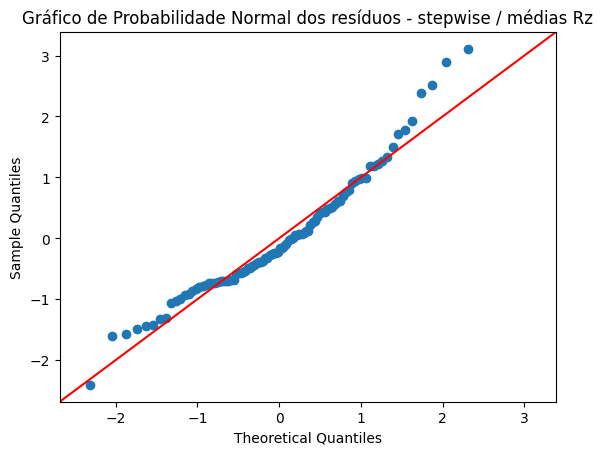

In [59]:
# Teste de normalidade: gráfico de probabilidade Normal
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_rugosidade_mediasRz.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal dos resíduos - stepwise / médias Rz")
plt.show()

In [167]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_rugosidade_mediasRz.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9566544992781233
statistics z  :  2.63895477705398
p-value  :  0.004158103685884947
Statistics W=0.95665, p-value=0.004158
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [168]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_rugosidade_mediasRz)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_rugosidade_mediasRz) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 9.974942447162087
p-value: 0.0017236680481598208
chisq: 9.974942447162087
p-value: 0.0017236680481598208
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


Analise de REGRESSÃO para medias de Rq

In [62]:
# Definição da fórmula utilizada no modelo
formula = 'medias_Rq ~ ' + formula2
formula

'medias_Rq ~ x1 + x2 + x3 + x4'

In [63]:
# Regressao medias Rq
modelo_rugosidade_mediasRq=sm.OLS.from_formula(formula,df_medias).fit()
modelo_rugosidade_mediasRq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              medias_Rq   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     48.94
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           6.69e-22
Time:                        17:29:55   Log-Likelihood:                -110.22
No. Observations:                  96   AIC:                             230.4
Df Residuals:                      91   BIC:                             243.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8950      0.430     -2.084      0.040      -1.748      -0.042
x1             2.1753      0.160     13.603      0.000       1.858       2.493
x2             0.2118      0.160      1.325      0.189      -0.106       0.529
x3            -0.2598      0.098     -2.653      0.009      -0.454      -0.065
x4            -0.0486      0.035     -1.392      0.167      -0.118       0.021
==============================================================================
Omnibus:                        4.579   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.127
Skew:                           0.503   Prob(JB):                        0.127
Kurtosis:                       3.141   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Regressao Stepwise medias Rq
from statstests.process import stepwise
modelo_step_rugosidade_mediasRq = stepwise(modelo_rugosidade_mediasRq, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x2')" with p-value equal to 0.18861702630061172 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.1689475372361134 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x2')", 'p-value': 0.18861702630061172}
{'atribute': "Q('x4')", 'p-value': 0.1689475372361134}

 Model after stepwise process...: 
 medias_Rq ~ Q('x1') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:              medias_Rq   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     94.32
Date:                Wed, 13 Aug 2025   Prob (F-

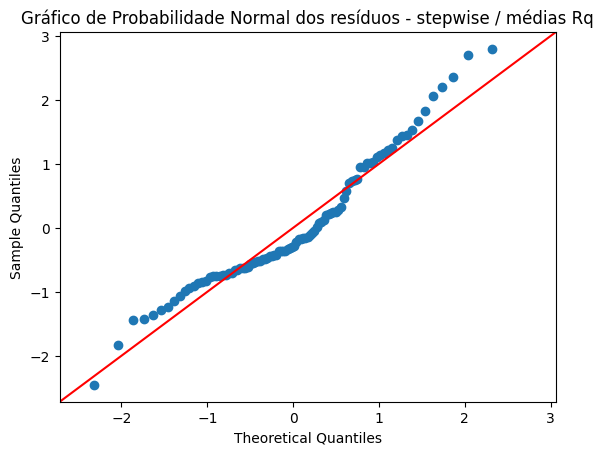

In [65]:
# Teste de normalidade: gráfico de probabilidade Normal
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_rugosidade_mediasRq.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal dos resíduos - stepwise / médias Rq")
plt.show()

In [170]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_rugosidade_mediasRq.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9501759966106045
statistics z  :  2.913538198679834
p-value  :  0.0017867905684894755
Statistics W=0.95018, p-value=0.001787
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [169]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_rugosidade_mediasRq)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_rugosidade_mediasRq) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 5.323382384597476
p-value: 0.024148403978937007
chisq: 5.323382384597476
p-value: 0.024148403978937007
Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade


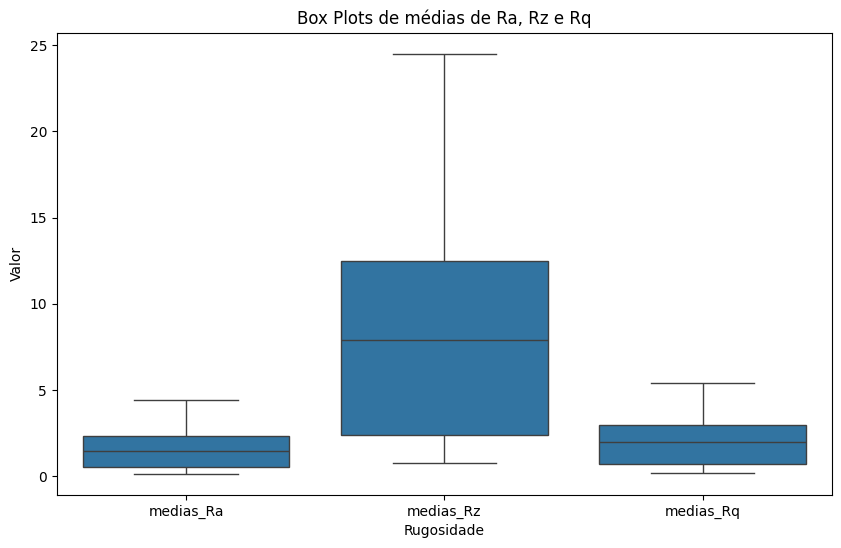

In [68]:
# Verificando outliers nos dados de médias de rugosidade
# Criando novo DataFrame com os dados em formato longo
df_longo2 = pd.melt(df_medias, value_vars=['medias_Ra', 'medias_Rz', 'medias_Rq'], var_name='Rugosidade', value_name='Valor')
# Cria o boxplot com categorias
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rugosidade', y='Valor', data=df_longo2)
plt.title('Box Plots de médias de Ra, Rz e Rq')
plt.show()

**(3) MODELO PARA Y COM VALORES MEDIOS DE Ra, Rz E Rq, COM INTERAÇÕES**

In [69]:
# Inserindo INTERACOES de duas variáveis no modelo com medias_Ra
formula = "medias_Ra ~ " + formula2 + " + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4"
formula

'medias_Ra ~ x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4'

In [70]:
# Estimando um novo modelo com a variável transformada e as interações de duas variaveis
modelo_inter_rugosidade_mediasRa = sm.OLS.from_formula(formula, df_medias).fit()
# Parâmetros do modelo
modelo_inter_rugosidade_mediasRa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              medias_Ra   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     23.83
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.14e-20
Time:                        17:31:52   Log-Likelihood:                -77.575
No. Observations:                  96   AIC:                             177.2
Df Residuals:                      85   BIC:                             205.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5399      1.037     -3.412      0.001      -5.603      -1.477
x1             3.4301      0.525      6.536      0.000       2.387       4.474
x2             1.4822      0.525      2.824      0.006       0.439       2.526
x3             0.0064      0.345      0.019      0.985      -0.679       0.692
x4             0.0901      0.128      0.701      0.485      -0.165       0.346
x1:x2         -0.6741      0.236     -2.862      0.005      -1.142      -0.206
x1:x3         -0.2336      0.144     -1.619      0.109      -0.520       0.053
x1:x4         -0.0536      0.051     -1.042      0.300      -0.156       0.049
x2:x3          0.0181      0.144      0.125      0.901      -0.269       0.305
x2:x4         -0.0664      0.051     -1.293      0.200      -0.169       0.036
x3:x4          0.0259      0.031      0.824      0.412      -0.037       0.089
==============================================================================
Omnibus:                        4.907   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.287
Skew:                           0.496   Prob(JB):                        0.117
Kurtosis:                       3.298   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Procedimento Stepwise no 'modelo_inter_rugosidade_mediasRa'
modelo_step_inter_rugosidade_mediasRa = stepwise(modelo_inter_rugosidade_mediasRa, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3')" with p-value equal to 0.9852298342314505 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x3')" with p-value equal to 0.8600585907241138 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.4855825381236024 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x1:x4')" with p-value equal to 0.4302640898519312 

Estimating model...: 
 medias_Ra ~ Q('x1') + Q('x2') + Q('x1:x2') + Q('x1:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3

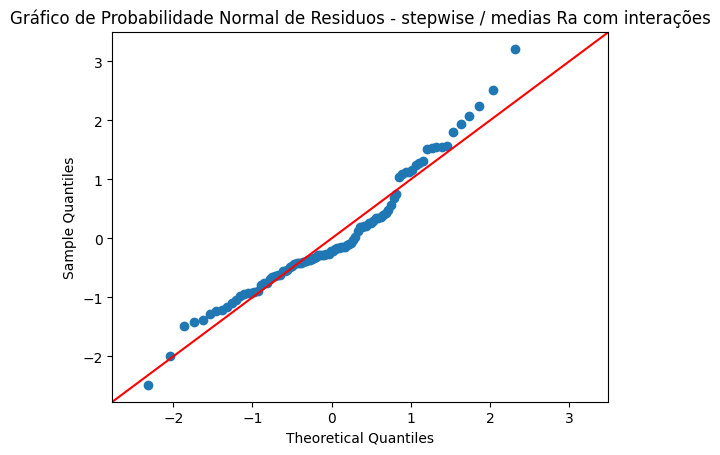

In [72]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_inter_rugosidade_mediasRa
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_inter_rugosidade_mediasRa.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos - stepwise / medias Ra com interações")
plt.show()

In [88]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_inter_rugosidade_mediasRa.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.954774100585429
statistics z  :  2.722667935887904
p-value  :  0.0032378555666972165
Statistics W=0.95477, p-value=0.003238
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [89]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_inter_rugosidade_mediasRa)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_inter_rugosidade_mediasRa) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 13.542050706801712
p-value: 0.0002485872762588702
chisq: 13.542050706801712
p-value: 0.0002485872762588702
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


MODELO PARA MEDIAS_Rz com interações

In [79]:
# Inserindo INTERACOES de duas variáveis no modelo com medias_Rz
formula = "medias_Rz ~ " + formula2 + " + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4"
formula

'medias_Rz ~ x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4'

In [80]:
# Estimando um novo modelo com a variável transformada e as interações de duas variaveis
modelo_inter_rugosidade_mediasRz = sm.OLS.from_formula(formula, df_medias).fit()
# Parâmetros do modelo
modelo_inter_rugosidade_mediasRz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              medias_Rz   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     31.48
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.78e-24
Time:                        17:36:01   Log-Likelihood:                -233.27
No. Observations:                  96   AIC:                             488.5
Df Residuals:                      85   BIC:                             516.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.2259      5.252     -3.470      0.001     -28.668      -7.784
x1            19.7560      2.657      7.437      0.000      14.474      25.038
x2             5.3099      2.657      1.999      0.049       0.028      10.592
x3            -0.1017      1.745     -0.058      0.954      -3.572       3.369
x4             0.6552      0.650      1.007      0.317      -0.638       1.949
x1:x2         -2.7073      1.192     -2.271      0.026      -5.078      -0.337
x1:x3         -1.4749      0.730     -2.020      0.047      -2.927      -0.023
x1:x4         -0.6049      0.260     -2.325      0.022      -1.122      -0.088
x2:x3          0.2042      0.730      0.280      0.780      -1.248       1.656
x2:x4         -0.2817      0.260     -1.083      0.282      -0.799       0.236
x3:x4          0.1957      0.159      1.228      0.223      -0.121       0.513
==============================================================================
Omnibus:                        7.352   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.842
Skew:                           0.614   Prob(JB):                       0.0327
Kurtosis:                       3.453   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Procedimento Stepwise no 'modelo_inter_rugosidade_mediasRz'
modelo_step_inter_rugosidade_mediasRz = stepwise(modelo_inter_rugosidade_mediasRz, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3')" with p-value equal to 0.9536578197669769 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x2') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x3')" with p-value equal to 0.7542721004713532 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x2') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.3135777625867148 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x2') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x4')" with p-value equal to 0.5542917773804352 

Estimating model...: 
 medias_Rz ~ Q('x1') + Q('x2') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x3:x4')

 No more atributes with p-v

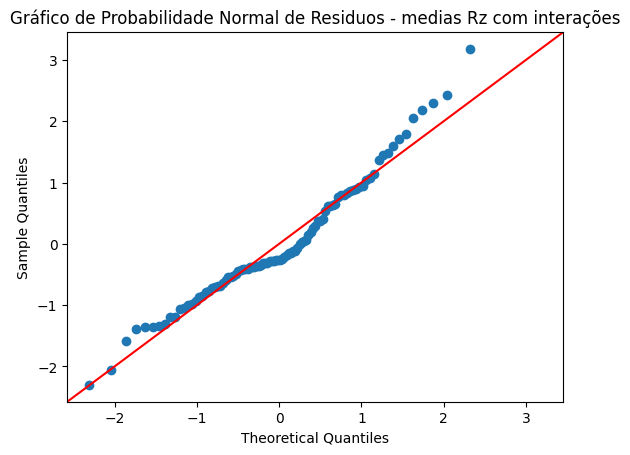

In [82]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_inter_rugosidade_mediasRa
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_inter_rugosidade_mediasRz.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos - medias Rz com interações")
plt.show()

In [86]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_inter_rugosidade_mediasRz.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9645889973553536
statistics z  :  2.240406499242084
p-value  :  0.012532272368546557
Statistics W=0.96459, p-value=0.012532
CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos


In [87]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_inter_rugosidade_mediasRz)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_inter_rugosidade_mediasRz) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 18.21612538306574
p-value: 2.0707644007979865e-05
chisq: 18.21612538306574
p-value: 2.0707644007979865e-05
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


MODELO PARA MEDIAS_Rq

In [90]:
# Inserindo INTERACOES de duas variáveis no modelo com medias_Rq
formula = "medias_Rq ~ " + formula2 + " + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4"
formula

'medias_Rq ~ x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4'

In [91]:
# Estimando um novo modelo com a variável transformada e as interações de duas variaveis
modelo_inter_rugosidade_mediasRq = sm.OLS.from_formula(formula, df_medias).fit()
# Parâmetros do modelo
modelo_inter_rugosidade_mediasRq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              medias_Rq   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     23.36
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           2.09e-20
Time:                        17:41:38   Log-Likelihood:                -101.90
No. Observations:                  96   AIC:                             225.8
Df Residuals:                      85   BIC:                             254.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5412      1.337     -3.398      0.001      -7.199      -1.884
x1             4.4751      0.676      6.619      0.000       3.131       5.819
x2             1.9578      0.676      2.896      0.005       0.613       3.302
x3            -0.0554      0.444     -0.125      0.901      -0.939       0.828
x4             0.1325      0.166      0.800      0.426      -0.197       0.462
x1:x2         -0.9102      0.303     -2.999      0.004      -1.514      -0.307
x1:x3         -0.2903      0.186     -1.562      0.122      -0.660       0.079
x1:x4         -0.0787      0.066     -1.188      0.238      -0.210       0.053
x2:x3          0.0292      0.186      0.157      0.876      -0.340       0.399
x2:x4         -0.0976      0.066     -1.473      0.144      -0.229       0.034
x3:x4          0.0416      0.041      1.026      0.308      -0.039       0.122
==============================================================================
Omnibus:                        4.061   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                3.745
Skew:                           0.484   Prob(JB):                        0.154
Kurtosis:                       3.030   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Procedimento Stepwise no 'modelo_inter_rugosidade_mediasRq'
modelo_step_inter_rugosidade_mediasRq = stepwise(modelo_inter_rugosidade_mediasRq, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3')" with p-value equal to 0.9009913042401139 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x2') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x3')" with p-value equal to 0.9191913269944079 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x2') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.3991377411821836 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x2') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x1:x4')" with p-value equal to 0.39054662588155953 

Estimating model...: 
 medias_Rq ~ Q('x1') + Q('x2') + Q('x1:x2') + Q('x1:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x

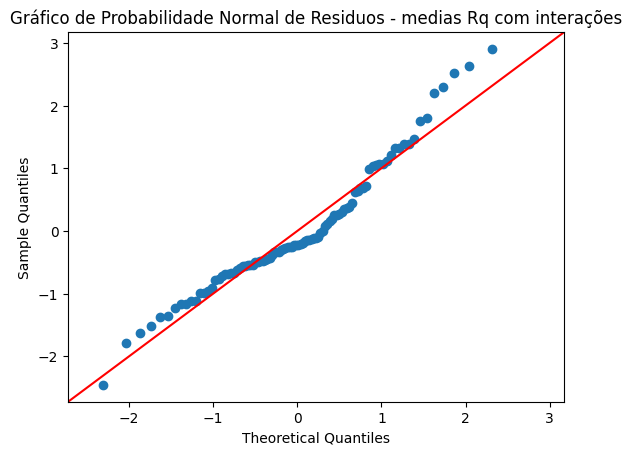

In [93]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_inter_rugosidade_mediasRq
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_inter_rugosidade_mediasRq.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos - medias Rq com interações")
plt.show()

In [94]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_inter_rugosidade_mediasRq.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9539357592328035
statistics z  :  2.7588739954202373
p-value  :  0.0029000447168222557
Statistics W=0.95394, p-value=0.002900
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [95]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_inter_rugosidade_mediasRq)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_inter_rugosidade_mediasRq) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 10.800876673085572
p-value: 0.0010960490461482217
chisq: 10.800876673085572
p-value: 0.0010960490461482217
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


**(4) MODELOS com variavel 'Y' TRANSFORMADA por BOXCOX**

In [96]:
# definindo as variáveis X
x1=df_rugosidade.PÁ
x2=df_rugosidade.Lado
x3=df_rugosidade.Area
x4=df_rugosidade.Posição

Modelo para rugosidade Ra transformada (bc_Ra)

In [97]:
# Transformação de Box-Cox
from scipy.stats import boxcox
# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_rugosidade['Ra'])
print("Lambda: ",lmbda)

Lambda:  0.04033777286422657


In [98]:
# Inserindo o lambda de Box-Cox no arquivo de dados
df_rugosidade['bc_Ra'] = yast
df_rugosidade

,PÁ,Lado,Area,Posição,Ra,Rz,Rq,bc_Ra
0,1,1,1,1,0.15,1.12,0.19,-1.826348
1,1,1,1,2,0.25,1.03,0.33,-1.348246
2,1,1,1,3,0.31,1.70,0.41,-1.143948
3,1,1,1,4,0.44,2.44,0.57,-0.807535
4,1,1,1,5,0.38,1.54,0.51,-0.948945
...,...,...,...,...,...,...,...,...
475,2,2,3,4,0.56,2.67,0.67,-0.573090
476,2,2,3,5,1.06,6.16,1.34,0.058337
477,2,2,3,6,0.61,3.78,0.76,-0.489401
478,2,2,3,7,1.47,7.20,1.86,0.388272


In [99]:
# modelo de regressão
formula = 'bc_Ra ~ ' + formula2
formula

'bc_Ra ~ x1 + x2 + x3 + x4'

In [100]:
# Estimando um novo modelo com todas as variáveis e a variável transformada
modelo_bc_rugosidadeRa = sm.OLS.from_formula(formula, df_rugosidade).fit()
# Parâmetros do modelo
modelo_bc_rugosidadeRa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bc_Ra   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.21e-63
Time:                        17:43:55   Log-Likelihood:                -617.65
No. Observations:                 480   AIC:                             1245.
Df Residuals:                     475   BIC:                             1266.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6558      0.216    -12.298      0.000      -3.080      -2.231
x1             1.5988      0.080     19.884      0.000       1.441       1.757
x2             0.2793      0.080      3.473      0.001       0.121       0.437
x3            -0.1391      0.049     -2.824      0.005      -0.236      -0.042
x4            -0.0201      0.018     -1.144      0.253      -0.055       0.014
==============================================================================
Omnibus:                       30.251   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.597
Skew:                           0.628   Prob(JB):                     5.06e-08
Kurtosis:                       2.677   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Procedimento Stepwise no 'modelo_bc_rugosidadeRa'
modelo_step_bc_rugosidadeRa = stepwise(modelo_bc_rugosidadeRa, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.2532375136993997 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x4')", 'p-value': 0.2532375136993997}

 Model after stepwise process...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:                  bc_Ra   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.82e-64
Time:                        17:43:58   Log-Likelihood:                -618.31
No. Observations:                 480   AIC:                             1245

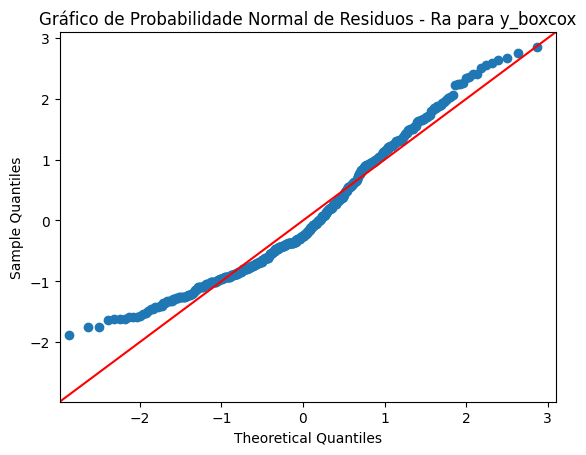

In [102]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_bc_rugosidadeRa
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_bc_rugosidadeRa.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos - Ra para y_boxcox")
plt.show()

In [103]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_rugosidadeRa.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9587984251504346
statistics z  :  5.827764368740284
p-value  :  2.808740879357721e-09
Statistics W=0.95880, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [104]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_bc_rugosidadeRa)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_rugosidadeRa) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 4.755813061380791
p-value: 0.033932510259616945
chisq: 4.755813061380791
p-value: 0.033932510259616945
Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade


Modelo para Ra transformada, com INTERACOES nas variaveis X

In [105]:
# Inserindo INTERACOES de duas variáveis no modelo com bc_Ra
formula = "bc_Ra ~ " + formula2 + " + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4"
formula

'bc_Ra ~ x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4'

In [106]:
# Estimando um novo modelo com a variável transformada e as interações de duas variaveis
modelo_bc_inter_rugosidadeRa = sm.OLS.from_formula(formula, df_rugosidade).fit()
# Parâmetros do modelo
modelo_bc_inter_rugosidadeRa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bc_Ra   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     49.71
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           2.34e-67
Time:                        17:46:31   Log-Likelihood:                -595.36
No. Observations:                 480   AIC:                             1213.
Df Residuals:                     469   BIC:                             1259.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0410      0.680     -7.408      0.000      -6.378      -3.704
x1             2.9453      0.344      8.557      0.000       2.269       3.622
x2             1.9944      0.344      5.794      0.000       1.318       2.671
x3            -0.4016      0.226     -1.776      0.076      -0.846       0.043
x4             0.1361      0.084      1.615      0.107      -0.029       0.302
x1:x2         -0.9330      0.154     -6.039      0.000      -1.237      -0.629
x1:x3          0.1047      0.095      1.106      0.269      -0.081       0.291
x1:x4         -0.0348      0.034     -1.031      0.303      -0.101       0.031
x2:x3          0.0343      0.095      0.363      0.717      -0.152       0.220
x2:x4         -0.0854      0.034     -2.533      0.012      -0.152      -0.019
x3:x4          0.0120      0.021      0.582      0.561      -0.029       0.053
==============================================================================
Omnibus:                       26.759   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.209
Skew:                           0.608   Prob(JB):                     2.76e-07
Kurtosis:                       2.824   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Procedimento Stepwise no 'modelo_bc_inter_rugosidadeRa'
modelo_step_bc_inter_rugosidadeRa = stepwise(modelo_bc_inter_rugosidadeRa, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x3')" with p-value equal to 0.7167707567923376 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3:x4')" with p-value equal to 0.5606971578783104 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4')

 Discarding atribute "Q('x1:x4')" with p-value equal to 0.30235344692897165 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x2:x4')

 Discarding atribute "Q('x1:x3')" with p-value equal to 0.2684699351795085 

Estimating model...: 
 bc_Ra ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x2:x4')

 No more atributes with p-value higher than 0.05

 Atribut

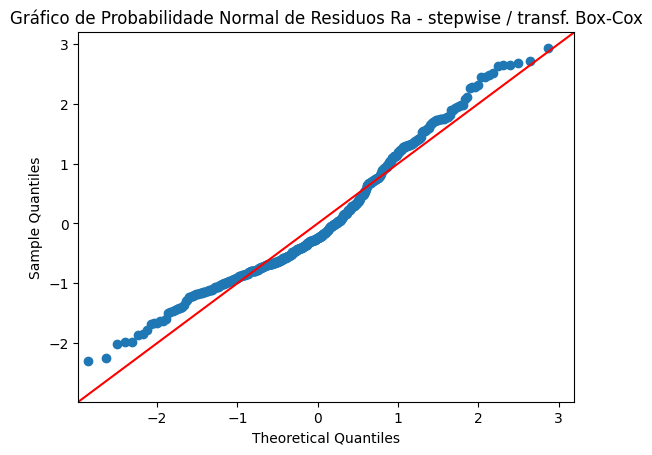

In [108]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_bc_inter_rugosidadeRa
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_bc_inter_rugosidadeRa.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos Ra - stepwise / transf. Box-Cox")
plt.show()

In [171]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_inter_rugosidadeRa.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.961918651923996
statistics z  :  5.655455210534712
p-value  :  7.771688039202903e-09
Statistics W=0.96192, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [110]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_bc_inter_rugosidadeRa)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_inter_rugosidadeRa) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 2.3367740267049317
p-value: 0.1622585798178606
chisq: 2.3367740267049317
p-value: 0.1622585798178606
Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade



MODELOS para Rz transformada (bc_Rz)

In [111]:
# Transformação de Box-Cox para Rz
from scipy.stats import boxcox
# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_rugosidade['Rz'])
print("Lambda: ",lmbda)

Lambda:  0.02418248809331138


In [112]:
# Inserindo o lambda de Box-Cox no arquivo de dados
df_rugosidade['bc_Rz'] = yast
df_rugosidade

,PÁ,Lado,Area,Posição,Ra,Rz,Rq,bc_Ra,bc_Rz
0,1,1,1,1,0.15,1.12,0.19,-1.826348,0.113484
1,1,1,1,2,0.25,1.03,0.33,-1.348246,0.029569
2,1,1,1,3,0.31,1.70,0.41,-1.143948,0.534047
3,1,1,1,4,0.44,2.44,0.57,-0.807535,0.901688
4,1,1,1,5,0.38,1.54,0.51,-0.948945,0.434045
...,...,...,...,...,...,...,...,...,...
475,2,2,3,4,0.56,2.67,0.67,-0.573090,0.993833
476,2,2,3,5,1.06,6.16,1.34,0.058337,1.858635
477,2,2,3,6,0.61,3.78,0.76,-0.489401,1.351334
478,2,2,3,7,1.47,7.20,1.86,0.388272,2.021959


In [113]:
# modelo de regressão
formula = 'bc_Rz ~ ' + formula2
formula

'bc_Rz ~ x1 + x2 + x3 + x4'

In [114]:
# Estimando um novo modelo com todas as variáveis e a variável transformada
modelo_bc_rugosidadeRz = sm.OLS.from_formula(formula, df_rugosidade).fit()
# Parâmetros do modelo
modelo_bc_rugosidadeRz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bc_Rz   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.49e-77
Time:                        17:49:38   Log-Likelihood:                -614.48
No. Observations:                 480   AIC:                             1239.
Df Residuals:                     475   BIC:                             1260.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0905      0.215     -5.083      0.000      -1.512      -0.669
x1             1.8260      0.080     22.860      0.000       1.669       1.983
x2             0.1814      0.080      2.272      0.024       0.024       0.338
x3            -0.1665      0.049     -3.403      0.001      -0.263      -0.070
x4            -0.0305      0.017     -1.748      0.081      -0.065       0.004
==============================================================================
Omnibus:                       38.958   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.974
Skew:                           0.766   Prob(JB):                     6.31e-11
Kurtosis:                       3.053   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Procedimento Stepwise no 'modelo_bc_rugosidadeRz'
modelo_step_bc_rugosidadeRz = stepwise(modelo_bc_rugosidadeRz, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.08117860279528695 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x4')", 'p-value': 0.08117860279528695}

 Model after stepwise process...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:                  bc_Rz   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.09e-77
Time:                        17:49:40   Log-Likelihood:                -616.02
No. Observations:                 480   AIC:                             12

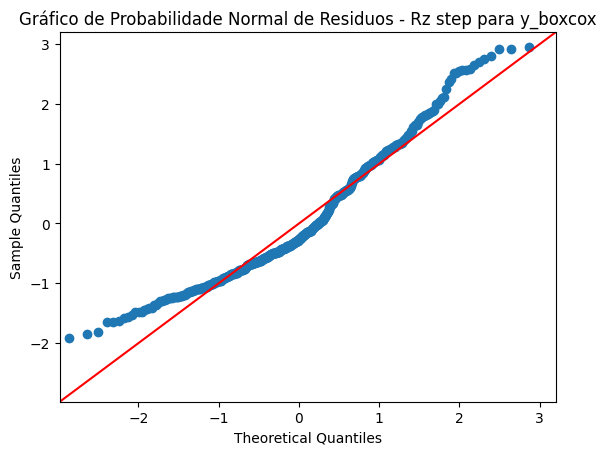

In [116]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_bc_rugosidadeRz
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_bc_rugosidadeRz.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos - Rz step para y_boxcox")
plt.show()

In [117]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_rugosidadeRz.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9508983057152826
statistics z  :  6.211577048000389
p-value  :  2.622772982880313e-10
Statistics W=0.95090, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [118]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_bc_rugosidadeRz)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_rugosidadeRz) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 8.157701114899663
p-value: 0.004728614146563358
chisq: 8.157701114899663
p-value: 0.004728614146563358
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


Modelo para Rz transformada, com INTERACOES nas variaveis X

In [119]:
# Inserindo INTERACOES de duas variáveis no modelo com bc_Rz
formula = "bc_Rz ~ " + formula2 + " + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4"
formula

'bc_Rz ~ x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4'

In [120]:
# Estimando um novo modelo com a variável transformada e as interações de duas variaveis
modelo_bc_inter_rugosidadeRz = sm.OLS.from_formula(formula, df_rugosidade).fit()
# Parâmetros do modelo
modelo_bc_inter_rugosidadeRz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bc_Rz   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     59.61
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.80e-77
Time:                        17:51:42   Log-Likelihood:                -600.42
No. Observations:                 480   AIC:                             1223.
Df Residuals:                     469   BIC:                             1269.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9192      0.688     -4.245      0.000      -4.271      -1.568
x1             2.8320      0.348      8.141      0.000       2.148       3.516
x2             1.5087      0.348      4.337      0.000       0.825       2.192
x3            -0.4392      0.229     -1.922      0.055      -0.888       0.010
x4             0.1257      0.085      1.476      0.141      -0.042       0.293
x1:x2         -0.6899      0.156     -4.418      0.000      -0.997      -0.383
x1:x3          0.1147      0.096      1.200      0.231      -0.073       0.303
x1:x4         -0.0446      0.034     -1.309      0.191      -0.112       0.022
x2:x3          0.0274      0.096      0.287      0.775      -0.160       0.215
x2:x4         -0.0772      0.034     -2.265      0.024      -0.144      -0.010
x3:x4          0.0132      0.021      0.634      0.526      -0.028       0.054
==============================================================================
Omnibus:                       36.291   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.932
Skew:                           0.730   Prob(JB):                     4.76e-10
Kurtosis:                       3.111   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# Procedimento Stepwise no 'modelo_bc_inter_rugosidadeRz'
modelo_step_bc_inter_rugosidadeRz = stepwise(modelo_bc_inter_rugosidadeRz, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x3')" with p-value equal to 0.7745638717763372 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3:x4')" with p-value equal to 0.5257558792550393 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4')

 Discarding atribute "Q('x1:x3')" with p-value equal to 0.23005716699478562 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x4') + Q('x2:x4')

 Discarding atribute "Q('x1:x4')" with p-value equal to 0.19062619156928523 

Estimating model...: 
 bc_Rz ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x2:x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.11

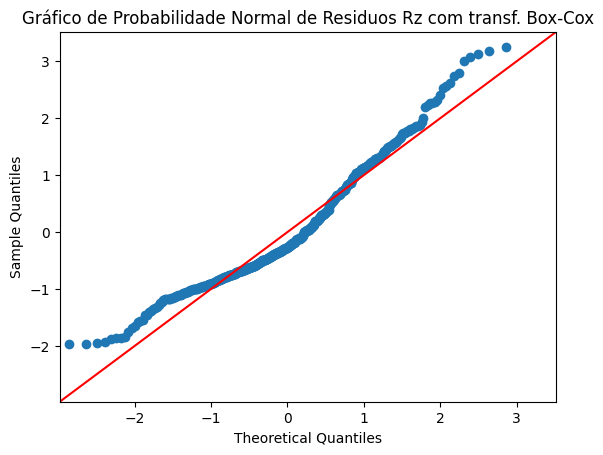

In [122]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_bc_inter_rugosidadeRz
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_bc_inter_rugosidadeRz.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos Rz com transf. Box-Cox")
plt.show()

In [123]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_inter_rugosidadeRz.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9514412104555751
statistics z  :  6.1872501508503275
p-value  :  3.0611386211278846e-10
Statistics W=0.95144, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [124]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_bc_inter_rugosidadeRz)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_inter_rugosidadeRz) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 9.086405540006265
p-value: 0.0028161521191246443
chisq: 9.086405540006265
p-value: 0.0028161521191246443
Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade


MODELOS para Rq transformada (bc_Rq)

In [125]:
# Transformação de Box-Cox
from scipy.stats import boxcox
# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_rugosidade['Rq'])
print("Lambda: ",lmbda)

Lambda:  0.037229285979389556


In [126]:
# Inserindo o lambda de Box-Cox no arquivo de dados
df_rugosidade['bc_Rq'] = yast
df_rugosidade

,PÁ,Lado,Area,Posição,Ra,Rz,Rq,bc_Ra,bc_Rz,bc_Rq
0,1,1,1,1,0.15,1.12,0.19,-1.826348,0.113484,-1.610433
1,1,1,1,2,0.25,1.03,0.33,-1.348246,0.029569,-1.086094
2,1,1,1,3,0.31,1.70,0.41,-1.143948,0.534047,-0.876963
3,1,1,1,4,0.44,2.44,0.57,-0.807535,0.901688,-0.556278
4,1,1,1,5,0.38,1.54,0.51,-0.948945,0.434045,-0.664975
...,...,...,...,...,...,...,...,...,...,...
475,2,2,3,4,0.56,2.67,0.67,-0.573090,0.993833,-0.397507
476,2,2,3,5,1.06,6.16,1.34,0.058337,1.858635,0.294270
477,2,2,3,6,0.61,3.78,0.76,-0.489401,1.351334,-0.273040
478,2,2,3,7,1.47,7.20,1.86,0.388272,2.021959,0.627801


In [127]:
# modelo de regressão
formula = 'bc_Rq ~ ' + formula2
formula

'bc_Rq ~ x1 + x2 + x3 + x4'

In [128]:
# Estimando um novo modelo com todas as variáveis e a variável transformada
modelo_bc_rugosidadeRq = sm.OLS.from_formula(formula, df_rugosidade).fit()
# Parâmetros do modelo
modelo_bc_rugosidadeRq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bc_Rq   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     98.47
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           5.57e-61
Time:                        17:54:35   Log-Likelihood:                -632.88
No. Observations:                 480   AIC:                             1276.
Df Residuals:                     475   BIC:                             1297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3713      0.223    -10.637      0.000      -2.809      -1.933
x1             1.6062      0.083     19.353      0.000       1.443       1.769
x2             0.2579      0.083      3.107      0.002       0.095       0.421
x3            -0.1468      0.051     -2.889      0.004      -0.247      -0.047
x4            -0.0213      0.018     -1.174      0.241      -0.057       0.014
==============================================================================
Omnibus:                       31.486   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.823
Skew:                           0.655   Prob(JB):                     1.66e-08
Kurtosis:                       2.725   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Procedimento Stepwise no 'modelo_bc_rugosidadeRa'
modelo_step_bc_rugosidadeRq = stepwise(modelo_bc_rugosidadeRq, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4')

 Discarding atribute "Q('x4')" with p-value equal to 0.24115914634681454 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('x4')", 'p-value': 0.24115914634681454}

 Model after stepwise process...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') 

                            OLS Regression Results                            
Dep. Variable:                  bc_Rq   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     130.7
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           8.87e-62
Time:                        17:54:39   Log-Likelihood:                -633.58
No. Observations:                 480   AIC:                             12

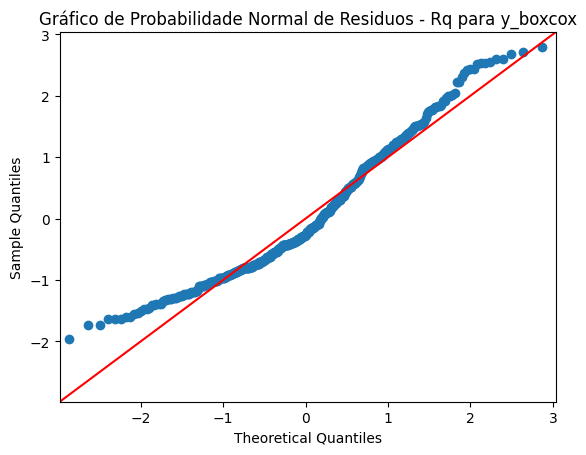

In [130]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_bc_rugosidadeRq
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_bc_rugosidadeRq.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos - Rq para y_boxcox")
plt.show()

In [131]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_rugosidadeRq.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9558808634799533
statistics z  :  5.977461135911364
p-value  :  1.1332098661143965e-09
Statistics W=0.95588, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [132]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_bc_rugosidadeRq)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_rugosidadeRq) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 6.5012640235786545
p-value: 0.012125778039454192
chisq: 6.5012640235786545
p-value: 0.012125778039454192
Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade


Modelo para Ra com variavel 'y' transformada, com INTERACOES nas variaveis X

In [133]:
# Inserindo INTERACOES de duas variáveis no modelo com bc_Rq
formula = "bc_Rq ~ " + formula2 + " + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4"
formula

'bc_Rq ~ x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4'

In [134]:
# Estimando um novo modelo com a variável transformada e as interações de duas variaveis
modelo_bc_inter_rugosidadeRq = sm.OLS.from_formula(formula, df_rugosidade).fit()
# Parâmetros do modelo
modelo_bc_inter_rugosidadeRq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bc_Rq   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     46.74
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.15e-64
Time:                        17:56:04   Log-Likelihood:                -611.87
No. Observations:                 480   AIC:                             1246.
Df Residuals:                     469   BIC:                             1292.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6544      0.704     -6.608      0.000      -6.038      -3.270
x1             2.9080      0.356      8.162      0.000       2.208       3.608
x2             1.9431      0.356      5.454      0.000       1.243       2.643
x3            -0.4619      0.234     -1.974      0.049      -0.922      -0.002
x4             0.1378      0.087      1.580      0.115      -0.034       0.309
x1:x2         -0.9234      0.160     -5.775      0.000      -1.238      -0.609
x1:x3          0.1235      0.098      1.262      0.208      -0.069       0.316
x1:x4         -0.0364      0.035     -1.043      0.298      -0.105       0.032
x2:x3          0.0466      0.098      0.476      0.634      -0.146       0.239
x2:x4         -0.0874      0.035     -2.505      0.013      -0.156      -0.019
x3:x4          0.0133      0.021      0.623      0.534      -0.029       0.055
==============================================================================
Omnibus:                       29.045   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.288
Skew:                           0.641   Prob(JB):                     5.91e-08
Kurtosis:                       2.859   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# Procedimento Stepwise no 'modelo_bc_inter_rugosidadeRq'
modelo_step_bc_inter_rugosidadeRq = stepwise(modelo_bc_inter_rugosidadeRq, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x3') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x2:x3')" with p-value equal to 0.6343670372460946 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4') + Q('x3:x4')

 Discarding atribute "Q('x3:x4')" with p-value equal to 0.5334177078495466 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x1:x4') + Q('x2:x4')

 Discarding atribute "Q('x1:x4')" with p-value equal to 0.2968259092255536 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x1:x3') + Q('x2:x4')

 Discarding atribute "Q('x1:x3')" with p-value equal to 0.20702463142291824 

Estimating model...: 
 bc_Rq ~ Q('x1') + Q('x2') + Q('x3') + Q('x4') + Q('x1:x2') + Q('x2:x4')

 No more atributes with p-value higher than 0.05

 Atribut

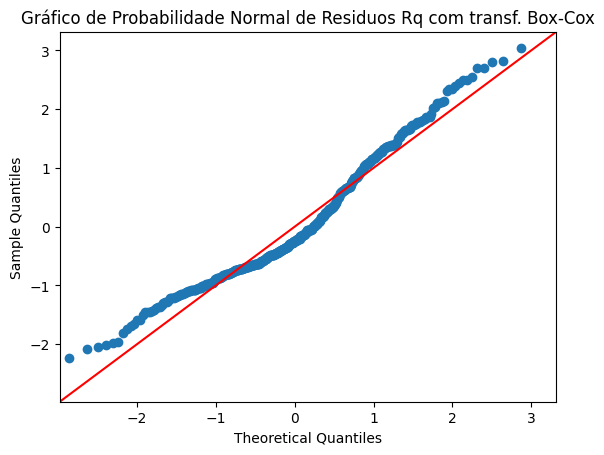

In [136]:
# Teste de aderencia: gráfico de probabilidade Normal
# modelo_step_bc_inter_rugosidadeRq
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(modelo_step_bc_inter_rugosidadeRq.resid, line='45', fit=True)
plt.title("Gráfico de Probabilidade Normal de Residuos Rq com transf. Box-Cox")
plt.show()

In [137]:
# Teste de Normalidade: Shapiro-Francia
from statstests.tests import shapiro_francia
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_inter_rugosidadeRq.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.01 #nível de significância
if p[1] > alpha:
	print('CONCLUSÃO: Não rejeitar H0, assim temos Distribuição Normal dos resíduos')
else:
	print('CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal')

method  :  Shapiro-Francia normality test
statistics W  :  0.9585382985918184
statistics z  :  5.841534909594537
p-value  :  2.5861018515796265e-09
Statistics W=0.95854, p-value=0.000000
CONCLUSÃO: Rejeitar H0, assim temos Distribuição não aderente à Normal


In [138]:
# Teste de Breusch-Pagan (Heterocedasticidade)
# Obs.: a presença de heterocedasticidade indica omissão de variável(is) explicativa(s) relevante(s)
# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
breusch_pagan_test(modelo_step_bc_inter_rugosidadeRq)
# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_inter_rugosidadeRq) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.01 #nível de significância
if p > alpha:
    print('Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade')
else:
	print('Rejeitar H0, assim temos EXISTENCIA de Heterocedasticidade')

chisq: 3.867151699510412
p-value: 0.05868176058804403
chisq: 3.867151699510412
p-value: 0.05868176058804403
Não rejeitar H0, assim temos AUSENCIA de Heterocedasticidade


**MODELAGEM MULTINÍVEL PARA Ra, Rz e Rq**

In [139]:
# Instalacao dos pacotes (verificar se e necessario)
!pip install statstests
!pip install -q pymer4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.5 MB/s eta 0:00:00


In [140]:
# Importacao dos pacotes
import statsmodels.api as sm
from pymer4.models import Lmer # estimacao de modelos HLM3
from scipy import stats # estatistica chi2
from statsmodels.iolib.summary2 import summary_col # comparacao entre modelos
from scipy.stats import gaussian_kde # insercao de KDEs em graficos
from matplotlib.gridspec import GridSpec # plotagem de graficos separados
import time   # definicao do intervalo de tempo entre graficos com animacao
import imageio # para geracao de figura GIF
from tqdm import tqdm # adiciona um indicador de progresso do codigo

ModuleNotFoundError: No module named 'great_tables'

**Modelagem Multinível HLM3**

In [141]:
# Atribuicao de categorias para as variaveis 'PÁ' e 'Lado'
df_rugosidade['PÁ'] = df_rugosidade['PÁ'].astype('category')
df_rugosidade['Lado'] = df_rugosidade['Lado'].astype('category')
# Caracteristicas das variaveis
df_rugosidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   PÁ       480 non-null    category
 1   Lado     480 non-null    category
 2   Area     480 non-null    int64   
 3   Posição  480 non-null    int64   
 4   Ra       480 non-null    float64 
 5   Rz       480 non-null    float64 
 6   Rq       480 non-null    float64 
 7   bc_Ra    480 non-null    float64 
 8   bc_Rz    480 non-null    float64 
 9   bc_Rq    480 non-null    float64 
dtypes: category(2), float64(6), int64(2)
memory usage: 31.3 KB


**MODELO NULO HLM3**

In [142]:
# MODELO NULO HLM3 para Ra
modelo_nulo_hlm3 = sm.MixedLM.from_formula(formula='Ra ~ 1',
                                           groups='PÁ',
                                           re_formula='1',
                                           vc_formula={'Lado': '0 + C(Lado)'},
                                           data=df_rugosidade).fit()
modelo_nulo_hlm3.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: Ra       
No. Observations: 480     Method:             REML     
No. Groups:       2       Scale:              2.1961   
Min. group size:  240     Log-Likelihood:     -875.1580
Max. group size:  240     Converged:          Yes      
Mean group size:  240.0                                
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  1.507     0.855  1.762  0.078  -0.170   3.183
PÁ Var     1.424     1.398                              
Lado Var   0.060     0.053                              
=======================================================

"""

In [143]:
# MODELO NULO HLM3 para Rz
modelo_nulo_hlm3 = sm.MixedLM.from_formula(formula='Rz ~ 1',
                                           groups='PÁ',
                                           re_formula='1',
                                           vc_formula={'Lado': '0 + C(Lado)'},
                                           data=df_rugosidade).fit()
modelo_nulo_hlm3.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Rz        
No. Observations: 480     Method:             REML      
No. Groups:       2       Scale:              60.5069   
Min. group size:  240     Log-Likelihood:     -1668.6929
Max. group size:  240     Converged:          Yes       
Mean group size:  240.0                                 
---------------------------------------------------------
           Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   7.991     5.012  1.594  0.111  -1.832  17.814
PÁ Var     49.738     9.143                              
Lado Var    0.488     0.128                              
========================================================

"""

In [144]:
# MODELO NULO HLM3 para Rq
modelo_nulo_hlm3 = sm.MixedLM.from_formula(formula='Rq ~ 1',
                                           groups='PÁ',
                                           re_formula='1',
                                           vc_formula={'Lado': '0 + C(Lado)'},
                                           data=df_rugosidade).fit()
modelo_nulo_hlm3.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Rq        
No. Observations: 480     Method:             REML      
No. Groups:       2       Scale:              3.7853    
Min. group size:  240     Log-Likelihood:     -1005.4525
Max. group size:  240     Converged:          Yes       
Mean group size:  240.0                                 
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   1.947     1.088  1.790  0.073  -0.184   4.079
PÁ Var      2.303     1.722                              
Lado Var    0.094     0.065                              
========================================================

"""

**MODELO HLM3 COM INTERAÇÕES**

In [145]:
# modelo HLM3 completo para variável Rz
# Não foi realizado; sugestões para trabalhos futuros

**COMPARAÇÃO DE MODELOS AJUSTADOS**

COMPARAÇÃO DE MODELOS estimados para Ra

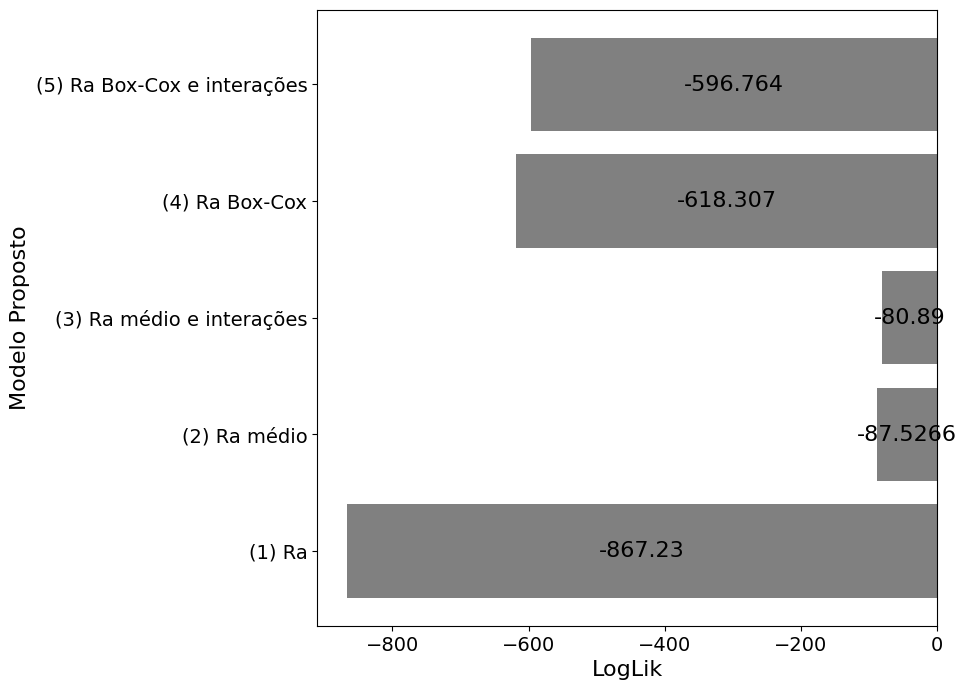

In [146]:
# COMPARACAO DOS MODELOS de Ra ESTIMADOS pelo LOGLIK
df_llf = pd.DataFrame({'modelo':['(1) Ra','(2) Ra médio','(3) Ra médio e interações','(4) Ra Box-Cox', '(5) Ra Box-Cox e interações'],
                      'loglik':[modelo_rugosidadeRa.llf,modelo_step_rugosidade_mediasRa.llf, modelo_step_inter_rugosidade_mediasRa.llf,modelo_step_bc_rugosidadeRa.llf,modelo_step_bc_inter_rugosidadeRa.llf],})

fig, ax = plt.subplots(figsize=(8,8))
c = ['gray','gray','gray','gray','gray']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='black', fontsize=16)
ax.set_ylabel("Modelo Proposto", fontsize=16)
ax.set_xlabel("LogLik", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

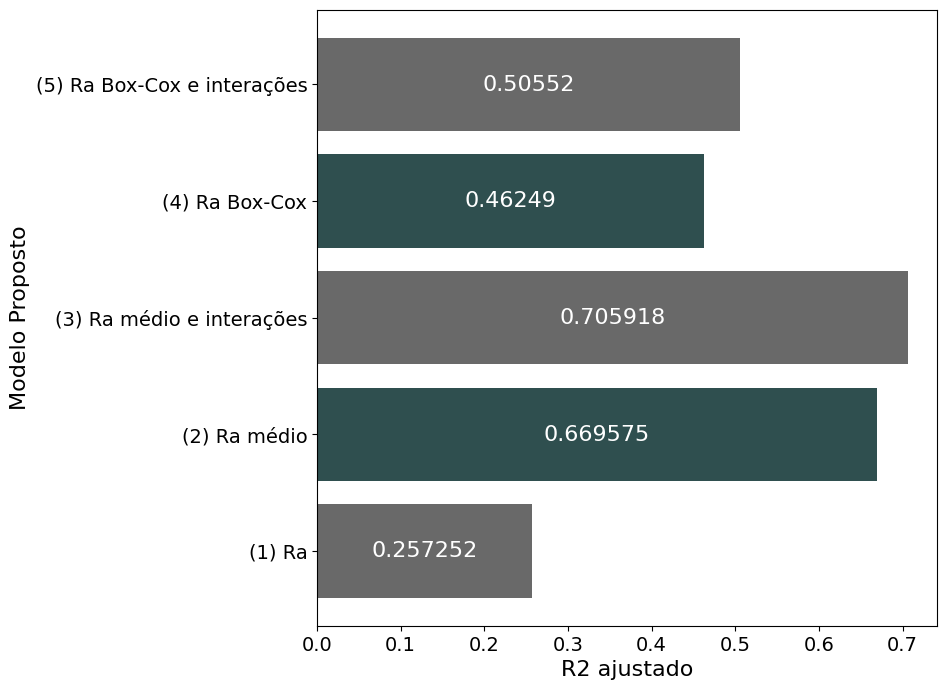

In [147]:
# COMPARACAO DOS MODELOS ESTIMADOS para Ra pelo R2 ajustado
df_rsquared = pd.DataFrame({'modelo':['(1) Ra','(2) Ra médio','(3) Ra médio e interações','(4) Ra Box-Cox', '(5) Ra Box-Cox e interações'],
                      'R2ajustado':[modelo_rugosidadeRa.rsquared_adj,modelo_step_rugosidade_mediasRa.rsquared_adj, modelo_step_inter_rugosidade_mediasRa.rsquared_adj,modelo_step_bc_rugosidadeRa.rsquared_adj,modelo_step_bc_inter_rugosidadeRa.rsquared_adj]})

fig, ax = plt.subplots(figsize=(8,8))
c = ['dimgray','darkslategray','dimgray','darkslategray']

ax1 = ax.barh(df_rsquared.modelo,df_rsquared.R2ajustado, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=16)
ax.set_ylabel("Modelo Proposto", fontsize=16)
ax.set_xlabel("R2 ajustado", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

MODELOS estimados para Rz

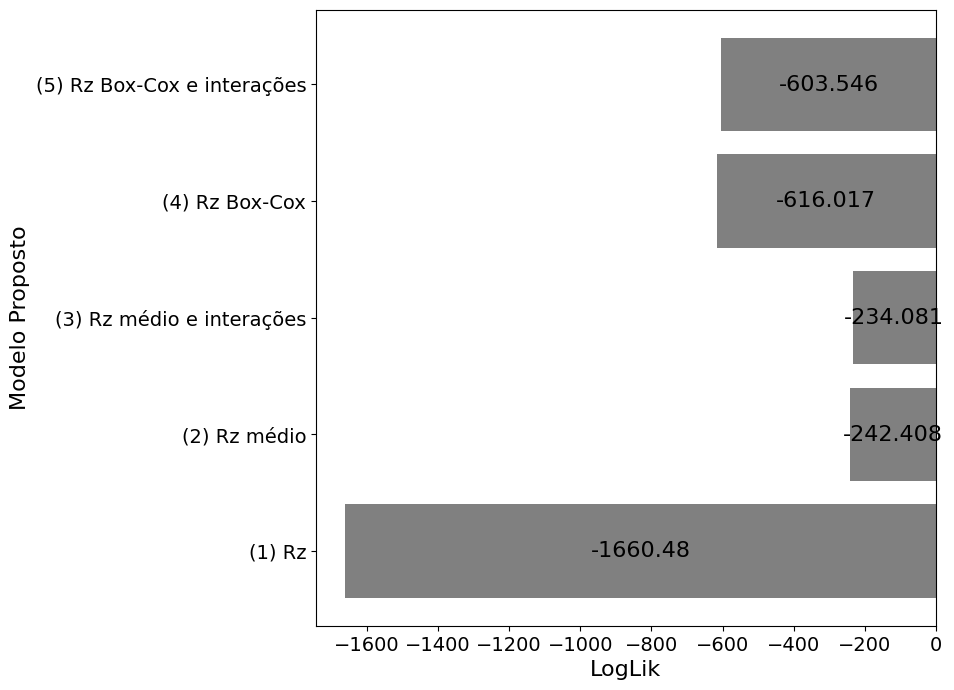

In [148]:
# COMPARACAO DOS MODELOS de Rz ESTIMADOS pelo LOGLIK
df_llf = pd.DataFrame({'modelo':['(1) Rz','(2) Rz médio','(3) Rz médio e interações','(4) Rz Box-Cox', '(5) Rz Box-Cox e interações'],
                      'loglik':[modelo_rugosidadeRz.llf,modelo_step_rugosidade_mediasRz.llf, modelo_step_inter_rugosidade_mediasRz.llf,modelo_step_bc_rugosidadeRz.llf,modelo_step_bc_inter_rugosidadeRz.llf],})

fig, ax = plt.subplots(figsize=(8,8))
c = ['gray','gray','gray','gray','gray']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='black', fontsize=16)
ax.set_ylabel("Modelo Proposto", fontsize=16)
ax.set_xlabel("LogLik", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

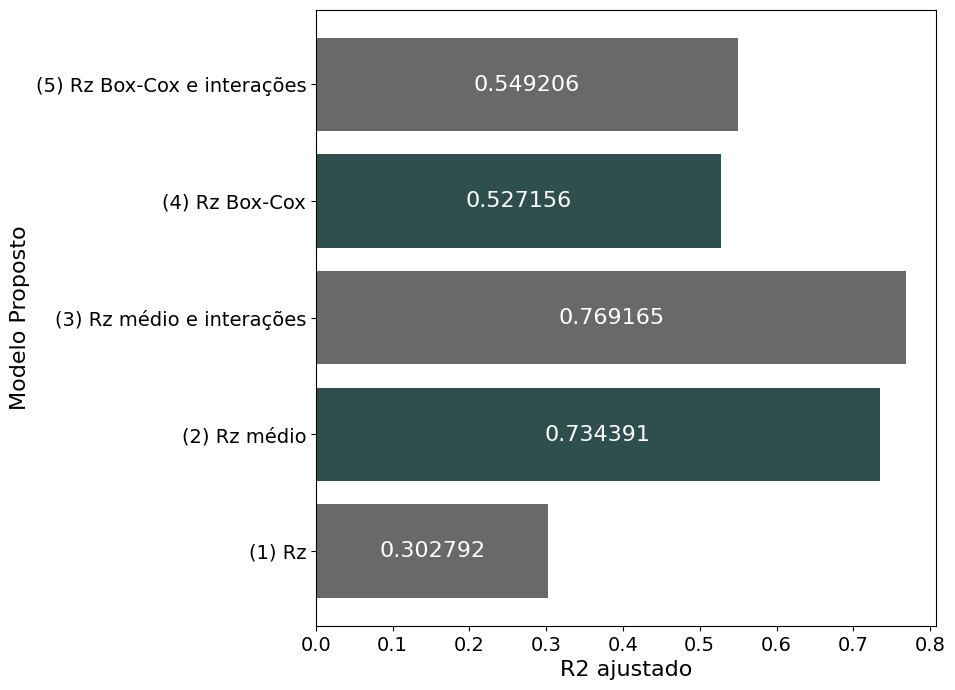

In [149]:
# COMPARACAO DOS MODELOS ESTIMADOS para Rz pelo R2 ajustado
df_rsquared = pd.DataFrame({'modelo':['(1) Rz','(2) Rz médio','(3) Rz médio e interações','(4) Rz Box-Cox', '(5) Rz Box-Cox e interações'],
                      'R2ajustado':[modelo_rugosidadeRz.rsquared_adj,modelo_step_rugosidade_mediasRz.rsquared_adj, modelo_step_inter_rugosidade_mediasRz.rsquared_adj,modelo_step_bc_rugosidadeRz.rsquared_adj,modelo_step_bc_inter_rugosidadeRz.rsquared_adj]})

fig, ax = plt.subplots(figsize=(8,8))
c = ['dimgray','darkslategray','dimgray','darkslategray']

ax1 = ax.barh(df_rsquared.modelo,df_rsquared.R2ajustado, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=16)
ax.set_ylabel("Modelo Proposto", fontsize=16)
ax.set_xlabel("R2 ajustado", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

MODELOS estimados para Rq

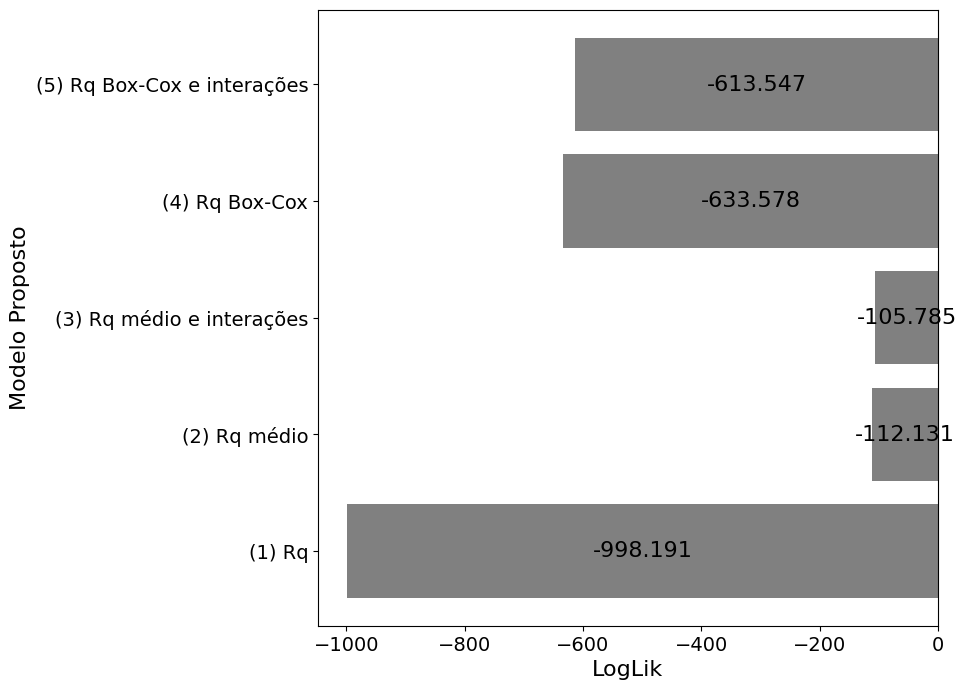

In [150]:
# COMPARACAO DOS MODELOS de Rq ESTIMADOS pelo LOGLIK
df_llf = pd.DataFrame({'modelo':['(1) Rq','(2) Rq médio','(3) Rq médio e interações','(4) Rq Box-Cox', '(5) Rq Box-Cox e interações'],
                      'loglik':[modelo_rugosidadeRq.llf,modelo_step_rugosidade_mediasRq.llf, modelo_step_inter_rugosidade_mediasRq.llf,modelo_step_bc_rugosidadeRq.llf,modelo_step_bc_inter_rugosidadeRq.llf],})

fig, ax = plt.subplots(figsize=(8,8))
c = ['gray','gray','gray','gray','gray']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='black', fontsize=16)
ax.set_ylabel("Modelo Proposto", fontsize=16)
ax.set_xlabel("LogLik", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

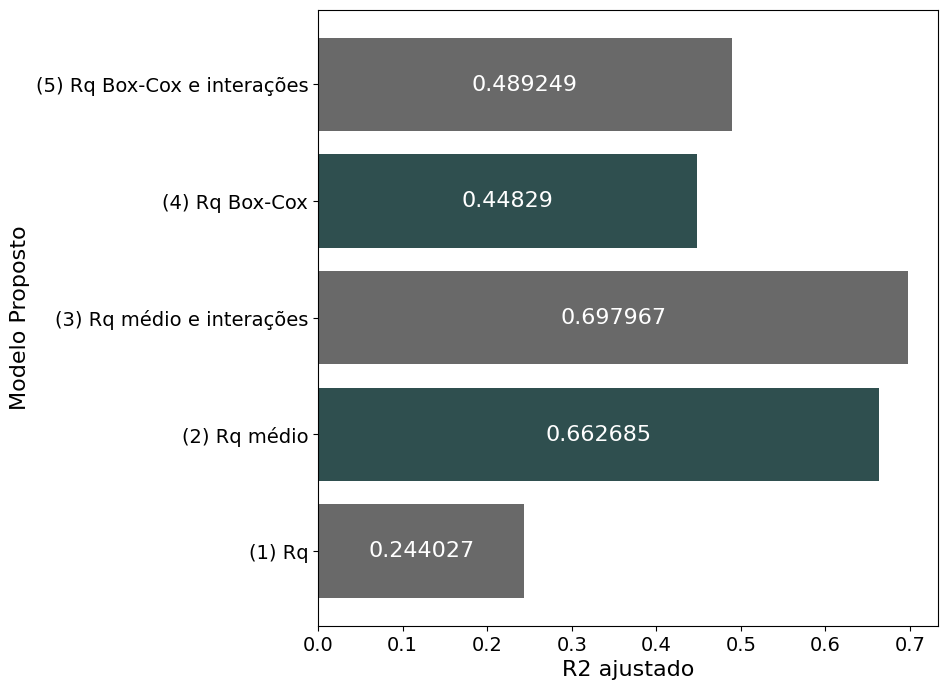

In [151]:
# COMPARACAO DOS MODELOS ESTIMADOS para Rq pelo R2 ajustado
df_rsquared = pd.DataFrame({'modelo':['(1) Rq','(2) Rq médio','(3) Rq médio e interações','(4) Rq Box-Cox', '(5) Rq Box-Cox e interações'],
                      'R2ajustado':[modelo_rugosidadeRq.rsquared_adj,modelo_step_rugosidade_mediasRq.rsquared_adj, modelo_step_inter_rugosidade_mediasRq.rsquared_adj,modelo_step_bc_rugosidadeRq.rsquared_adj,modelo_step_bc_inter_rugosidadeRq.rsquared_adj]})

fig, ax = plt.subplots(figsize=(8,8))
c = ['dimgray','darkslategray','dimgray','darkslategray']

ax1 = ax.barh(df_rsquared.modelo,df_rsquared.R2ajustado, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=16)
ax.set_ylabel("Modelo Proposto", fontsize=16)
ax.set_xlabel("R2 ajustado", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

**GRÁFICOS DE PREVISÃO da rugosidade pelos modelos de REGRESSÃO MÚLTIPLA escolhidos para Ra, Rz e Rq**

RUGOSIDADE Ra

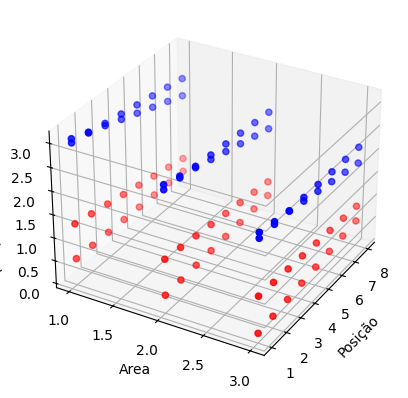

In [152]:
# Gráfico de PREVISÃO para rugosidade medias_Ra (Area x Posição x Pá)
z = modelo_inter_rugosidade_mediasRa.predict(df_medias)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mapa de cores para a variável x3=PÁ
colors = {'1': 'red', '2': 'blue'}  # Customize colors as needed
x1 = df_medias.index.get_level_values('Area')
x2 = df_medias.index.get_level_values('Posição')
c_values = [colors[str(val)] for val in df_medias.index.get_level_values('PÁ')]
# Plotando o gráfico em função de x3=PÁ
ax.scatter(x1, x2, z,c=c_values,marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Posição')
ax.set_zlabel('Ra_médio (um)')
# Move a escala do eixo z para a direita
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

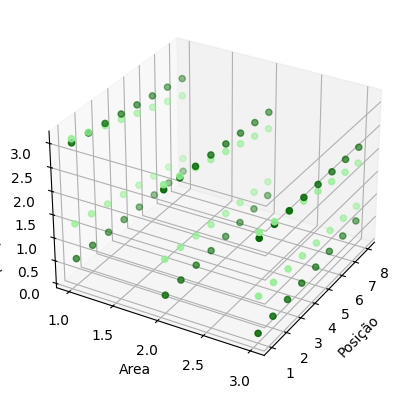

In [153]:
# Gráfico de PREVISÃO para rugosidade medias_Ra (Area x Posição x Pá) - CORES DIFERENTES PARA OS LADOS DAS PÁS
z = modelo_inter_rugosidade_mediasRa.predict(df_medias)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mapa de cores para a variável x4=Lado
colors = {'1': 'darkgreen', '2': 'lightgreen'}
x1 = df_medias.index.get_level_values('Area')
x2 = df_medias.index.get_level_values('Posição')
c_values = [colors[str(val)] for val in df_medias.index.get_level_values('Lado')]
# Plotando o gráfico em função de x3=PÁ
ax.scatter(x1, x2, z,c=c_values,marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Posição')
ax.set_zlabel('Ra_médio (um)')
# Move a escala do eixo z para a direita
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

Rugosidade Rz

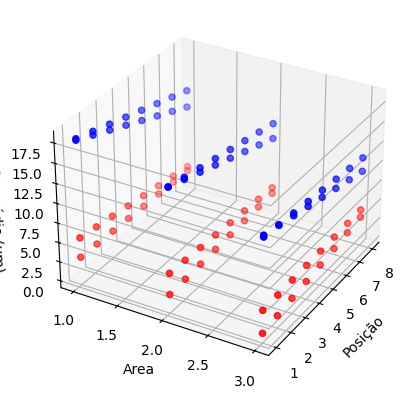

In [154]:
# Gráfico de PREVISÃO para rugosidade medias_Rz (Area x Posição x Pá)
z = modelo_inter_rugosidade_mediasRz.predict(df_medias)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mapa de cores para a variável x3=PÁ
colors = {'1': 'red', '2': 'blue'}  # Customize colors as needed
x1 = df_medias.index.get_level_values('Area')
x2 = df_medias.index.get_level_values('Posição')
c_values = [colors[str(val)] for val in df_medias.index.get_level_values('PÁ')]
# Plotando o gráfico em função de x3=PÁ
ax.scatter(x1, x2, z,c=c_values,marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Posição')
ax.set_zlabel('Rz_médio (um)')
# Move a escala do eixo z para a direita
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

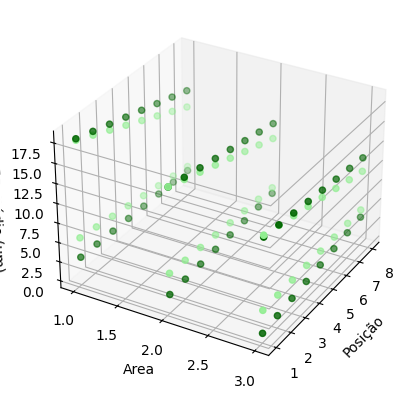

In [155]:
# Gráfico de PREVISÃO para rugosidade medias_Rz (Area x Posição x Pá) - CORES DIFERENTES PARA OS LADOS DAS PÁS
z = modelo_inter_rugosidade_mediasRz.predict(df_medias)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mapa de cores para a variável x4=Lado
colors = {'1': 'darkgreen', '2': 'lightgreen'}
x1 = df_medias.index.get_level_values('Area')
x2 = df_medias.index.get_level_values('Posição')
c_values = [colors[str(val)] for val in df_medias.index.get_level_values('Lado')]
# Plotando o gráfico em função de x3=PÁ
ax.scatter(x1, x2, z,c=c_values,marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Posição')
ax.set_zlabel('Rz_médio (um)')
# Move a escala do eixo z para a direita
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

Rugosidade Rq

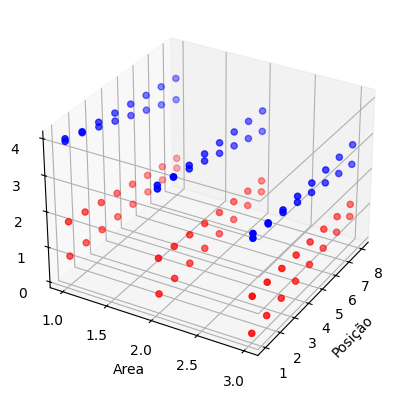

In [156]:
# Gráfico de PREVISÃO para rugosidade medias_Rq (Area x Posição x Pá)
z = modelo_inter_rugosidade_mediasRq.predict(df_medias)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mapa de cores para a variável x3=PÁ
colors = {'1': 'red', '2': 'blue'}  # Customize colors as needed
x1 = df_medias.index.get_level_values('Area')
x2 = df_medias.index.get_level_values('Posição')
c_values = [colors[str(val)] for val in df_medias.index.get_level_values('PÁ')]
# Plotando o gráfico em função de x3=PÁ
ax.scatter(x1, x2, z,c=c_values,marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Posição')
ax.set_zlabel('Rq_médio (um)')
# Move a escala do eixo z para a direita
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

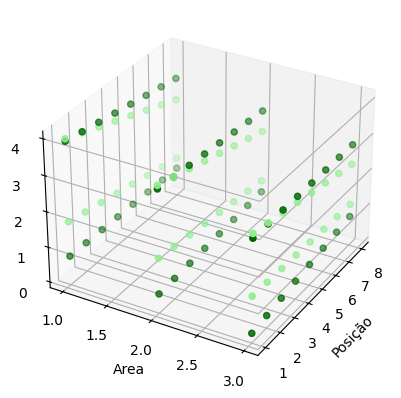

In [157]:
# Gráfico de PREVISÃO para rugosidade medias_Rq (Area x Posição x Pá) - CORES DIFERENTES PARA OS LADOS DAS PÁS
z = modelo_inter_rugosidade_mediasRq.predict(df_medias)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mapa de cores para a variável x4=Lado
colors = {'1': 'darkgreen', '2': 'lightgreen'}
x1 = df_medias.index.get_level_values('Area')
x2 = df_medias.index.get_level_values('Posição')
c_values = [colors[str(val)] for val in df_medias.index.get_level_values('Lado')]
# Plotando o gráfico em função de x3=PÁ
ax.scatter(x1, x2, z,c=c_values,marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Posição')
ax.set_zlabel('Rq_médio (um)')
# Move a escala do eixo z para a direita
tmp_planes = ax.zaxis._PLANES
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3],
                    tmp_planes[0], tmp_planes[1],
                    tmp_planes[4], tmp_planes[5])
plt.show()

In [158]:
# FIM